In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import plot_is
import yt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

Making a comparison with the [result without AMR](https://github.com/dorislee0309/StarFormationCode/blob/master/FosterChevalier_is/10_17_2015_Result_Larger_domain.ipynb). This is stored in HPSS, to retrieve this I need to look at the index files.

Don't open up the 500 GB whole data file just transfer the data/ member files that I need for comparison'

In [5]:
cd /project/projectdirs/astro250/doris

/global/project/projectdirs/astro250/doris


#### Left: with AMR(level 5~8) ; Right: no AMR (level=7)

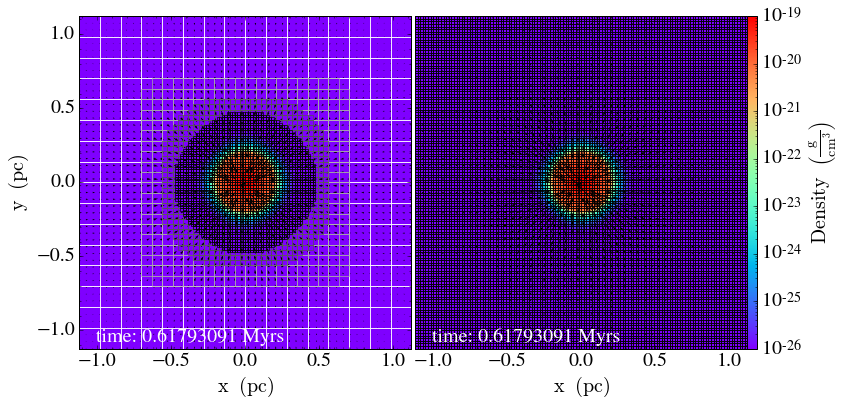

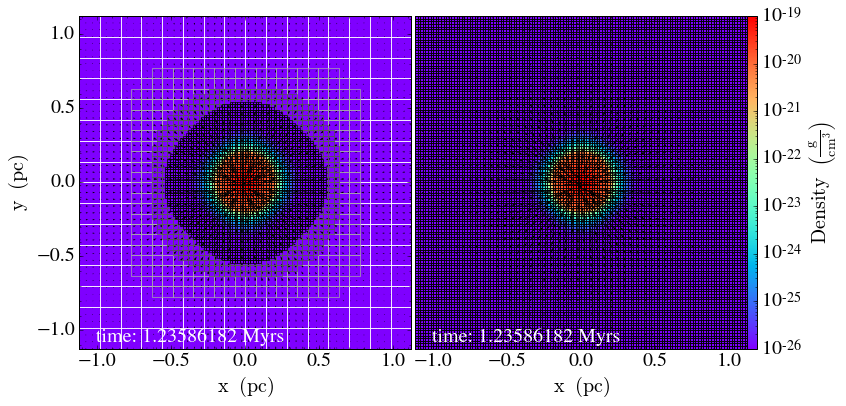

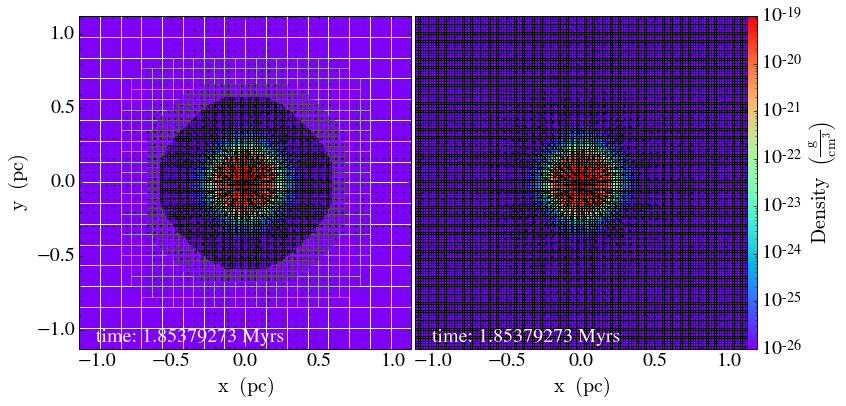

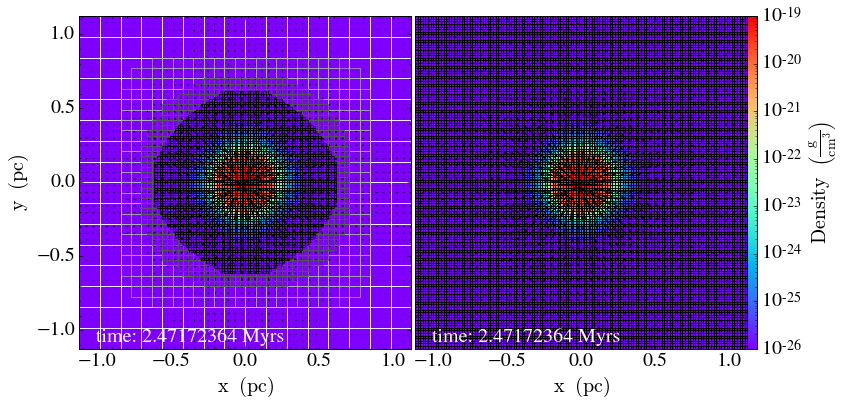

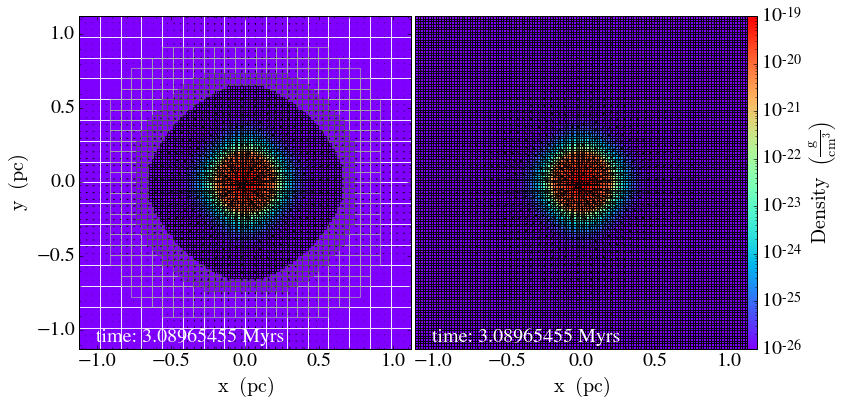

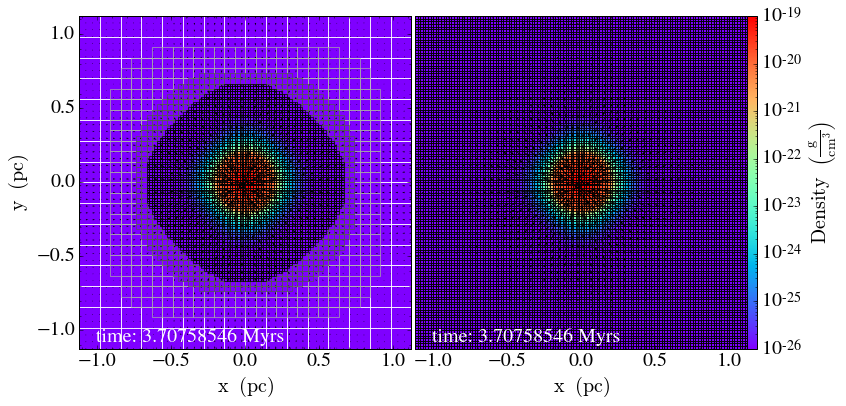

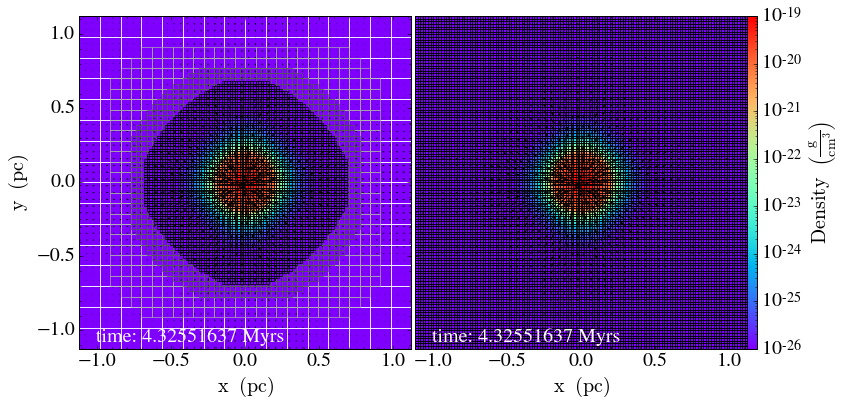

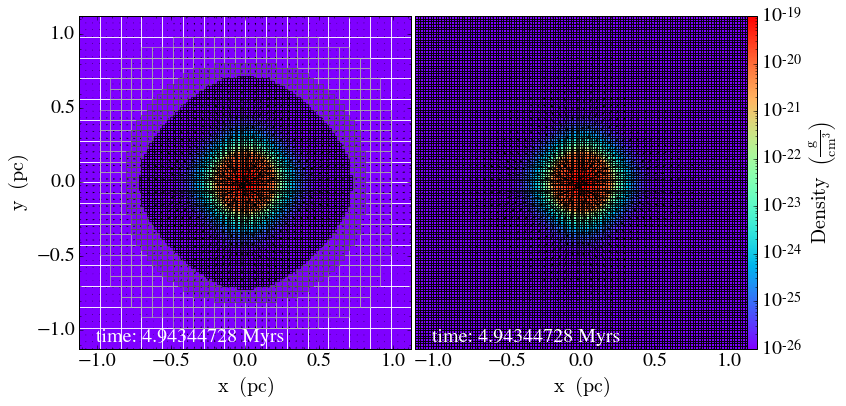

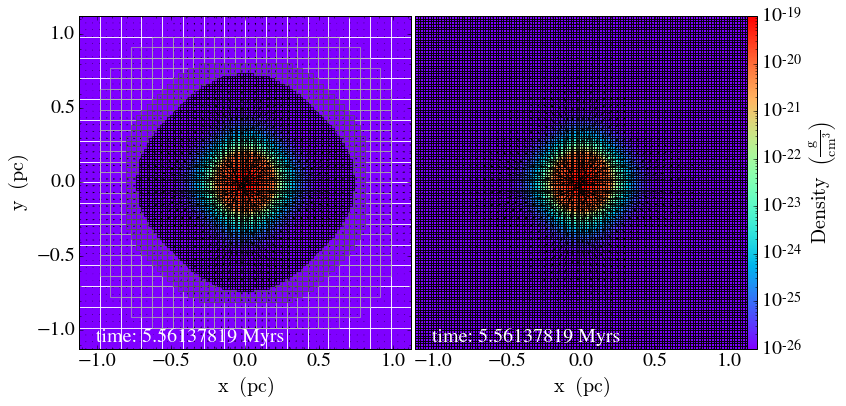

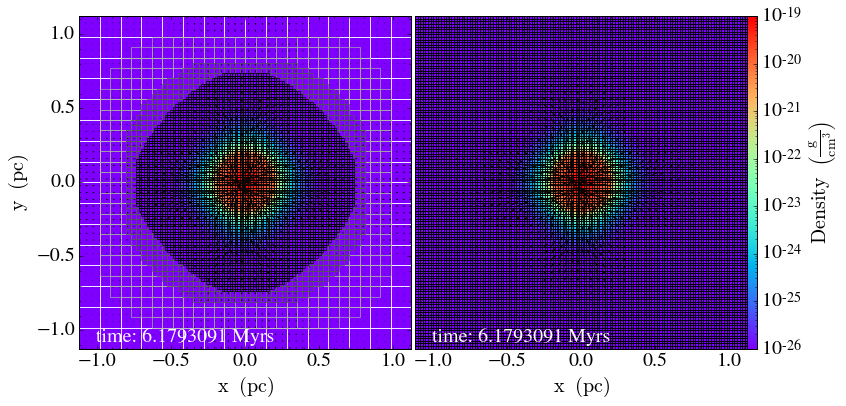

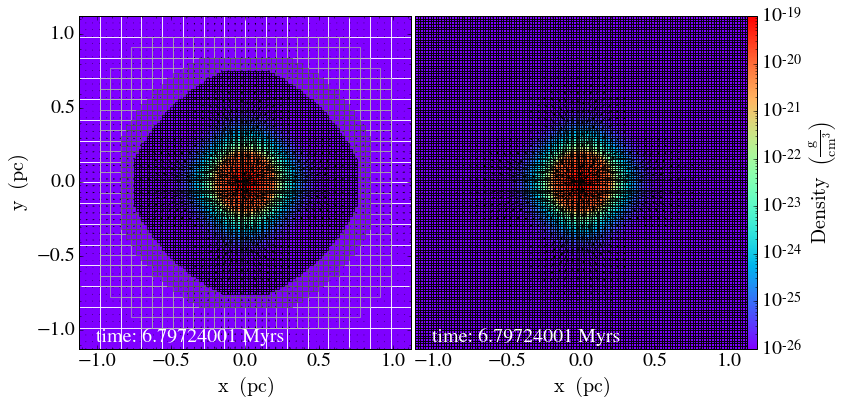

In [9]:
for timestep in np.arange(1,113):
    if timestep %10 ==0:
        fns = ['ramses2/trunk/ramses/bin/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5)), 'ramses2_data/data/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5))]
        fig = plt.figure()
        grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                        nrows_ncols = (1,2),
                        axes_pad = 0.05,
                        label_mode = "L",
                        share_all = True,
                        cbar_location="right",
                        cbar_mode="single",
                        cbar_size="3%",
                        cbar_pad="0%")
        physical_quantity="density"
        for i, fn in enumerate(fns):
            ds = yt.load(fn) 
            slc = yt.SlicePlot(ds, "z",physical_quantity)
            slc.set_axes_unit('pc')
            slc.set_cmap(physical_quantity,"rainbow")
            slc.set_font_size(20)
            slc.set_zlim('density', 1e-19, 1e-26)# Ensure the colorbar limits match for all plots
#             slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
#             slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
            slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
            slc.annotate_velocity()
            slc.annotate_grids()
            #Forcing Sliceplot to redraw AxesGrid
            plot = slc.plots['density']
            plot.figure = fig
            plot.axes = grid[i].axes
            plot.cax = grid.cbar_axes[i]
            slc._setup_plots()

I accidentally setted the color bar limit wrong (very positive RV limits!) but this is quite interesting actually. Noticed that the corner has a very strong radial velocities which explains why it cancelled out the inflow velocities. The velocites are more significant in the cases where there is no AMR.

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/yt/visualization/plot_container.py:100: RuntimeWarning: divide by zero encountered in log10
  expA = np.floor(np.log10(vmin))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/yt/visualization/plot_container.py:102: RuntimeWarning: invalid value encountered in double_scalars
  cofA = np.ceil(vmin/10**expA)


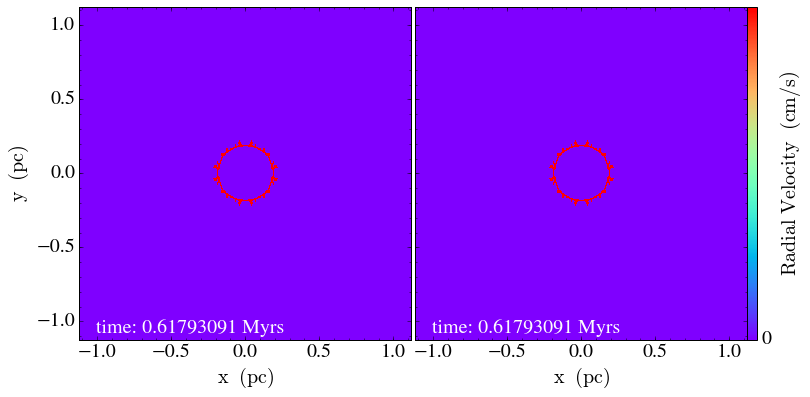

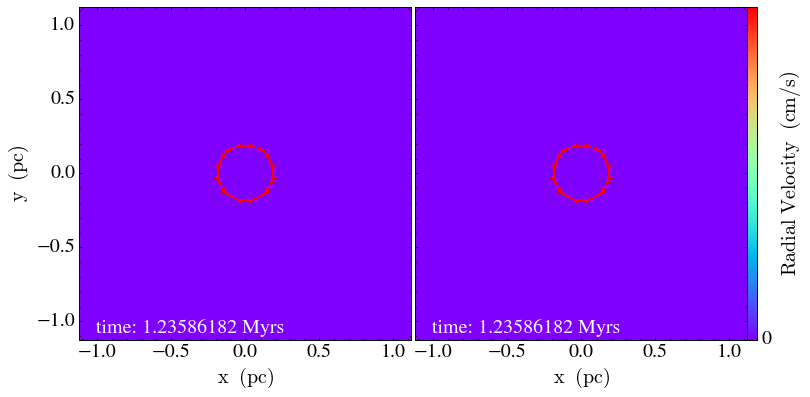

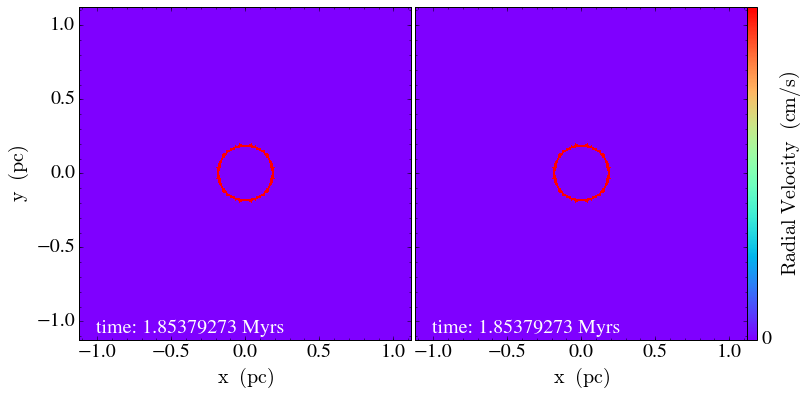

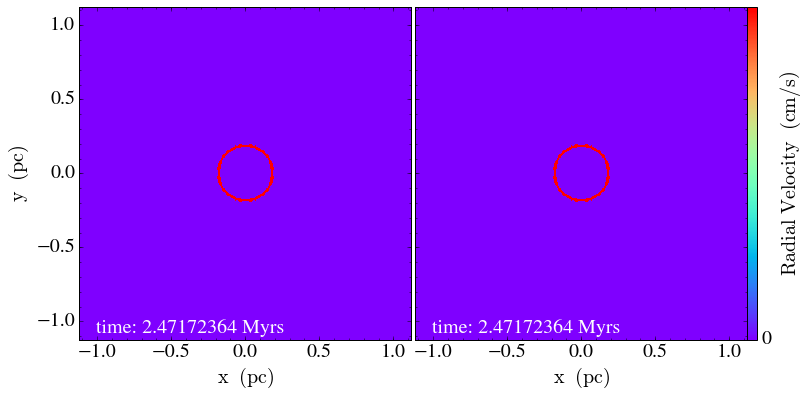

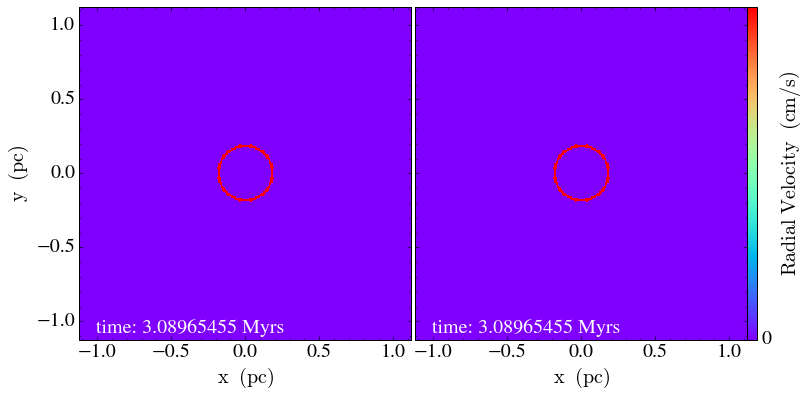

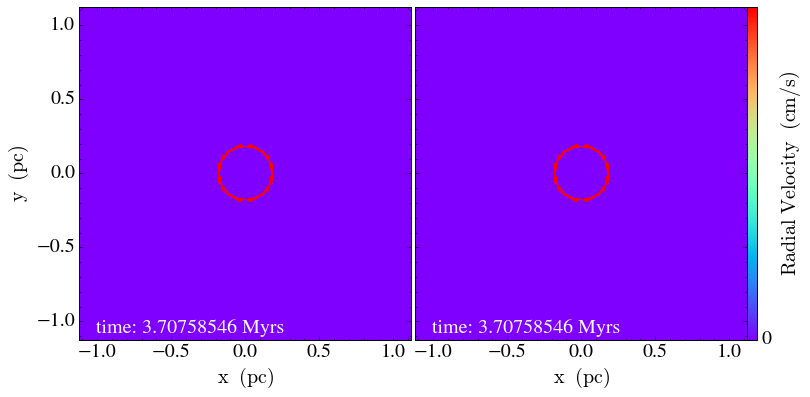

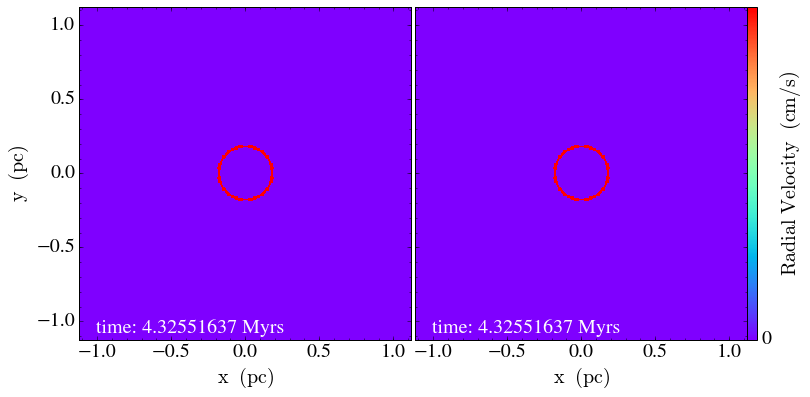

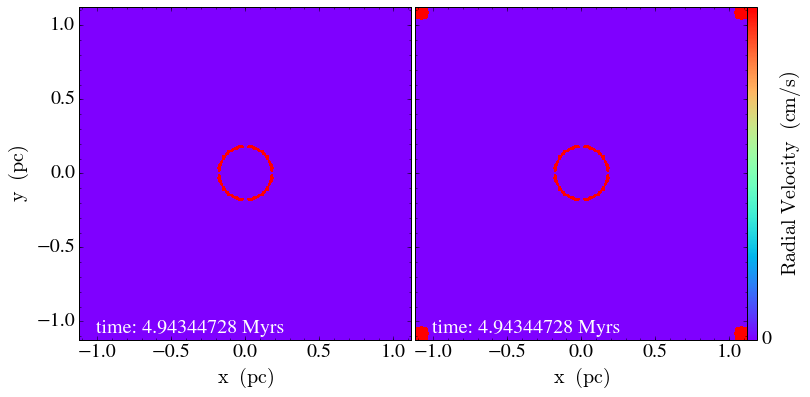

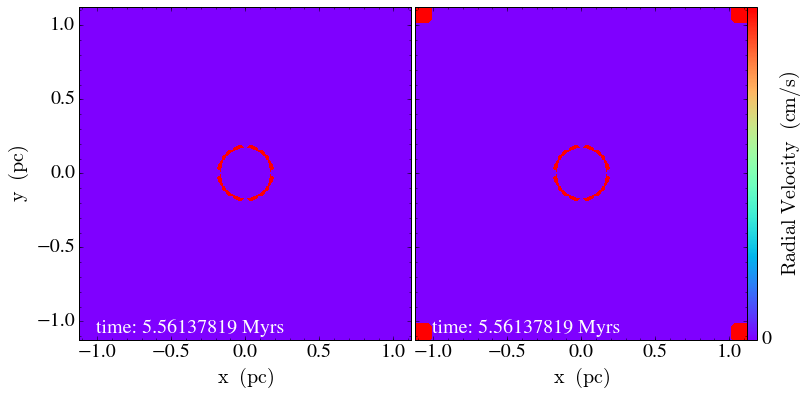

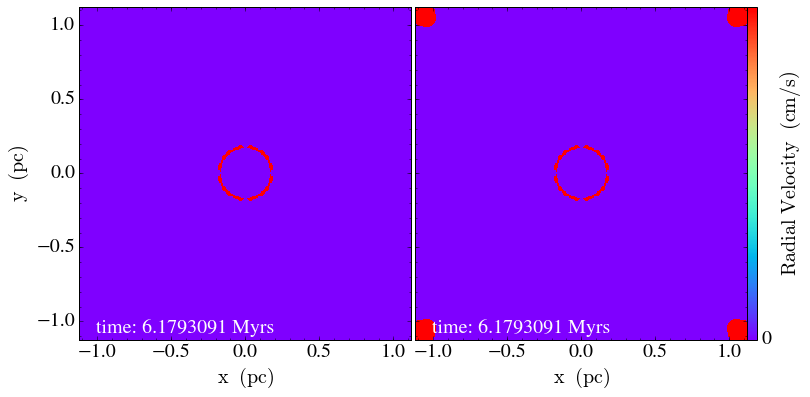

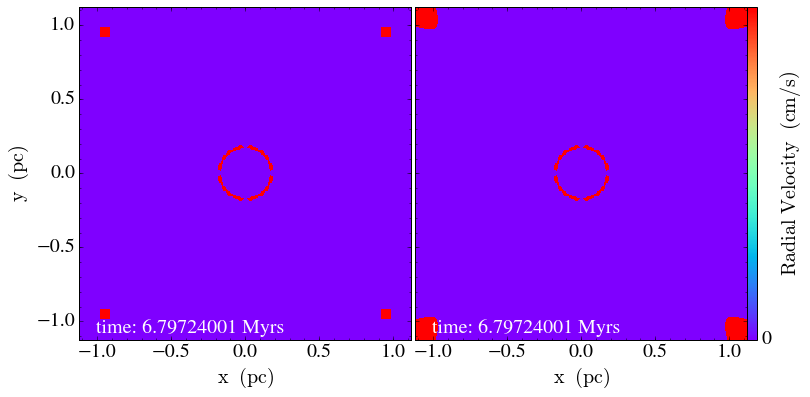

In [6]:
physical_quantity="radial_velocity"
for timestep in np.arange(1,113):
    if timestep %10 ==0:
        fns = ['ramses2/trunk/ramses/bin/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5)), 'ramses2_data/data/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5))]
        fig = plt.figure()
        grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                        nrows_ncols = (1,2),
                        axes_pad = 0.05,
                        label_mode = "L",
                        share_all = True,
                        cbar_location="right",
                        cbar_mode="single",
                        cbar_size="3%",
                        cbar_pad="0%")
        for i, fn in enumerate(fns):
            ds = yt.load(fn) 
            slc = yt.SlicePlot(ds, "z",physical_quantity)
            slc.set_axes_unit('pc')
            slc.set_cmap(physical_quantity,"rainbow")
            slc.set_font_size(20)
            slc.set_zlim(physical_quantity, 0, 1e-26)# Ensure the colorbar limits match for all plots
#             slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
#             slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
            slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
#             slc.annotate_velocity()
#             slc.annotate_grids()
            #Forcing Sliceplot to redraw AxesGrid
            plot = slc.plots[physical_quantity]
            plot.figure = fig
            plot.axes = grid[i].axes
            plot.cax = grid.cbar_axes[i]
            slc._setup_plots()

Can't really see the difference if you stretch the colorbar along equal +/- ranges

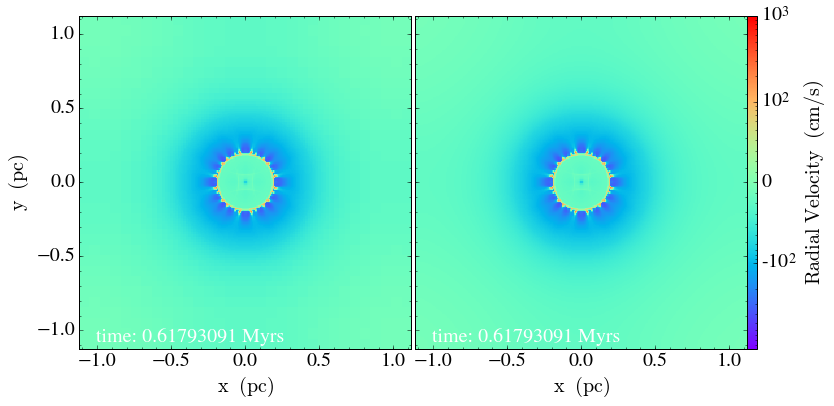

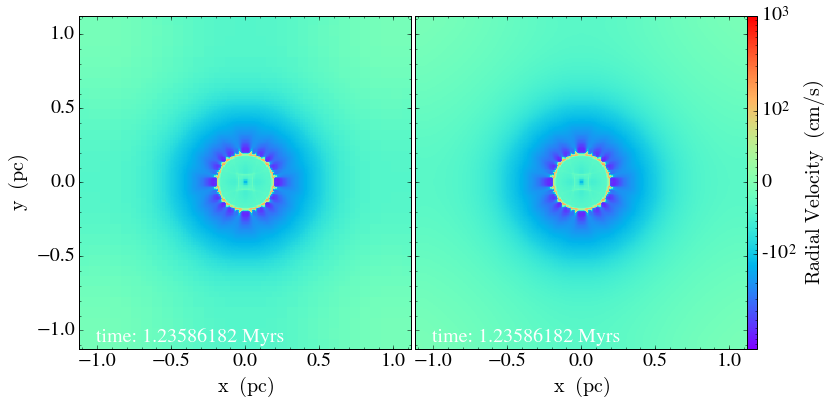

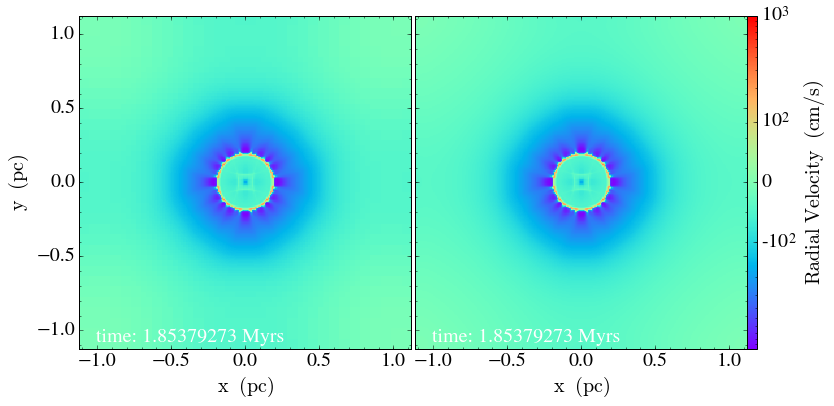

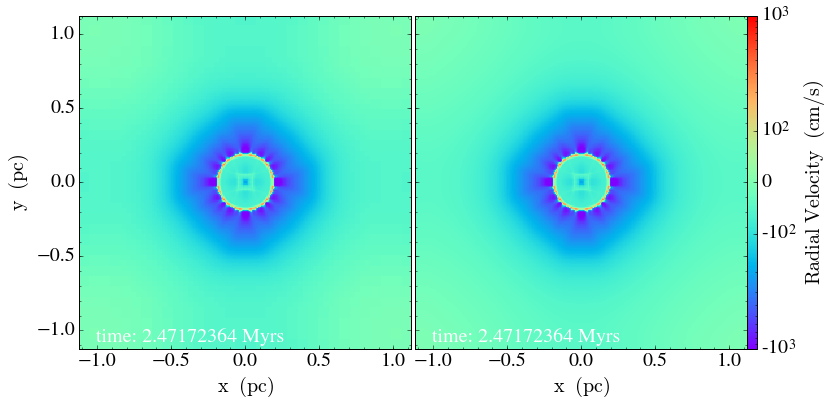

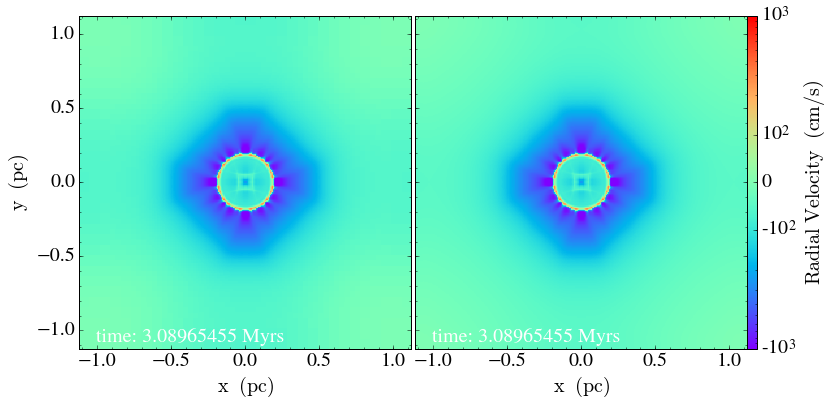

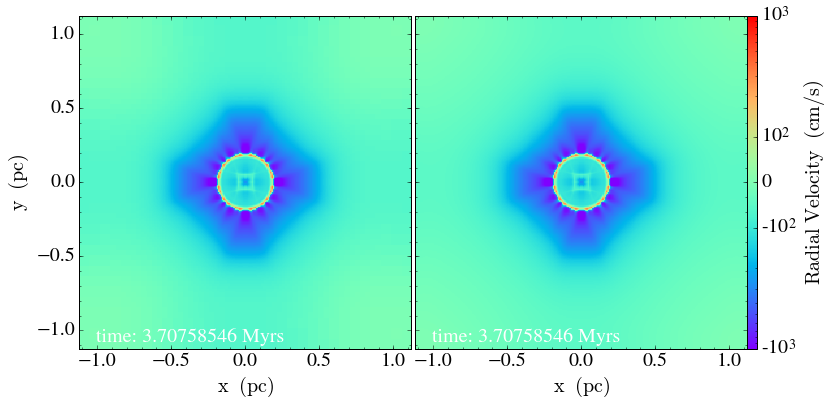

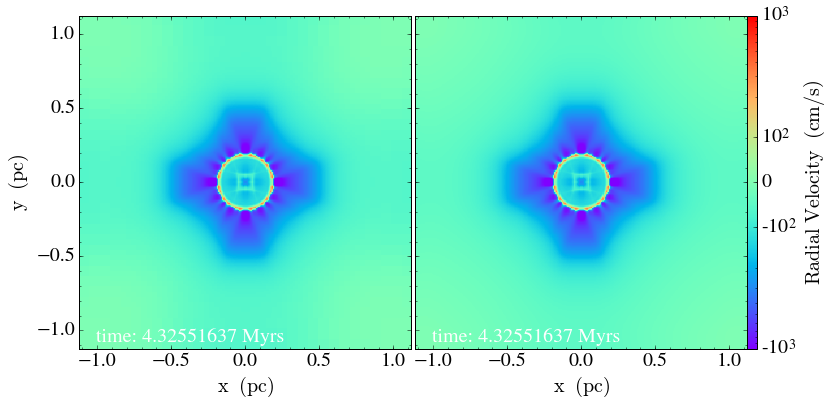

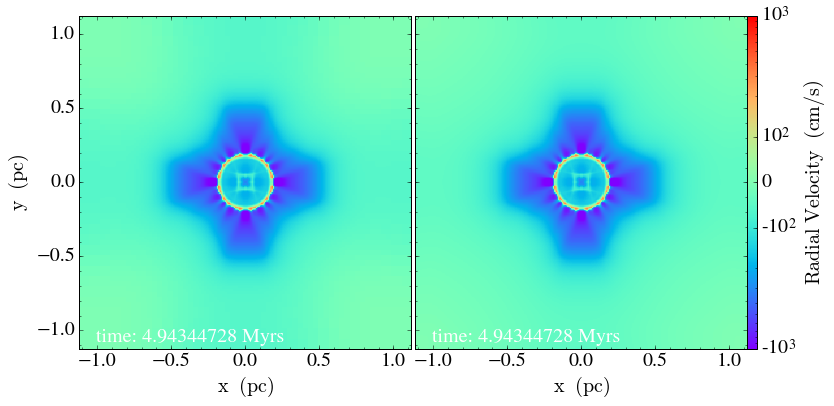

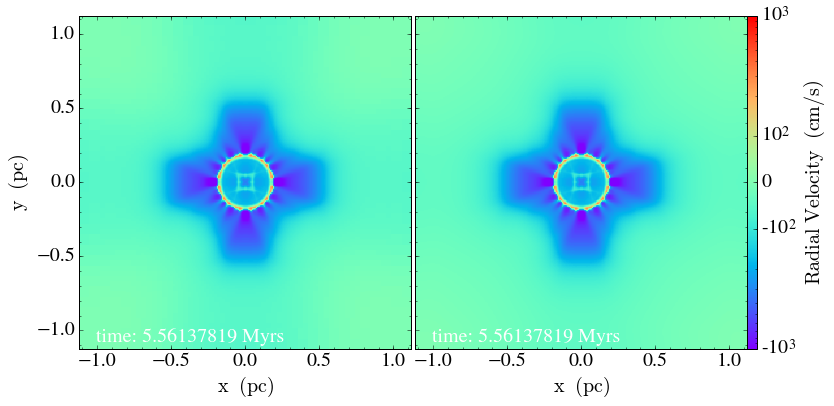

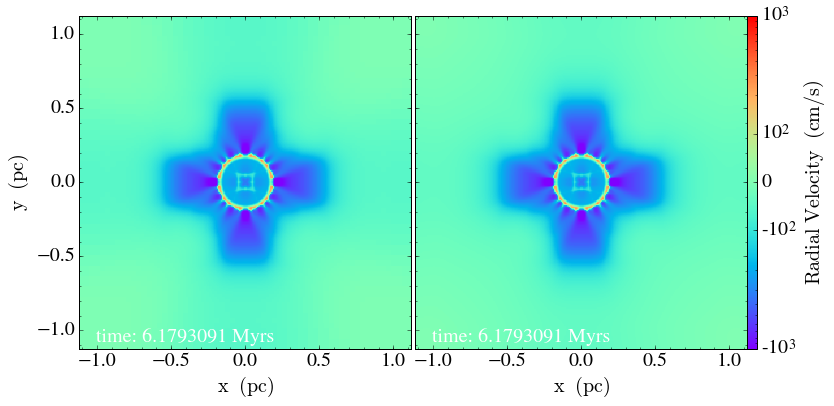

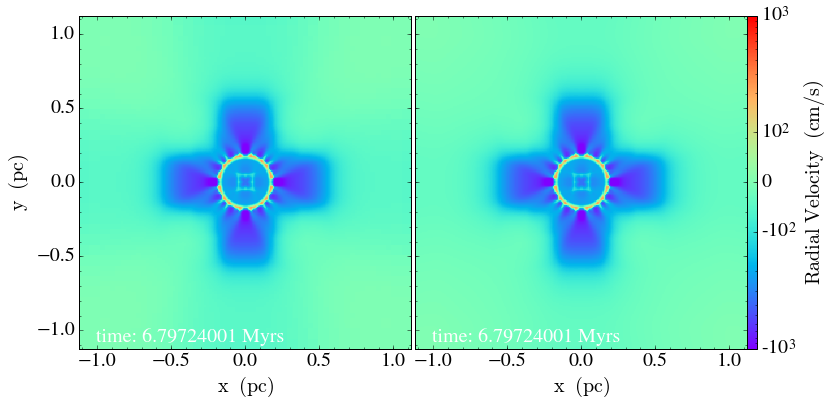

In [11]:
physical_quantity="radial_velocity"
for timestep in np.arange(1,113):
    if timestep %10 ==0:
        fns = ['ramses2/trunk/ramses/bin/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5)), 'ramses2_data/data/output_{0}/info_{0}.txt'.format(str(timestep).zfill(5))]
        fig = plt.figure()
        grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                        nrows_ncols = (1,2),
                        axes_pad = 0.05,
                        label_mode = "L",
                        share_all = True,
                        cbar_location="right",
                        cbar_mode="single",
                        cbar_size="3%",
                        cbar_pad="0%")
        for i, fn in enumerate(fns):
            ds = yt.load(fn) 
            slc = yt.SlicePlot(ds, "z",physical_quantity)
            slc.set_axes_unit('pc')
            slc.set_cmap(physical_quantity,"rainbow")
            slc.set_font_size(20)
            slc.set_zlim(physical_quantity, -1e3, 1e3)# Ensure the colorbar limits match for all plots
#             slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
#             slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
            slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
#             slc.annotate_velocity()
#             slc.annotate_grids()
            #Forcing Sliceplot to redraw AxesGrid
            plot = slc.plots[physical_quantity]
            plot.figure = fig
            plot.axes = grid[i].axes
            plot.cax = grid.cbar_axes[i]
            slc._setup_plots()